In [0]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy #we will use displacy to visualise our data

In [0]:
nlp=spacy.load('en_core_web_sm')#This sm says that it is a small model and en says that it is a english dictionary

In [0]:
text="Apple, This is first sentence. and Google , this is another one. here 3rd one is"

In [0]:
doc=nlp(text)

In [36]:
for token in doc:#This for loop is for creating the sentence into tokens
  print(token)

Apple
,
This
is
first
sentence
.
and
Google
,
this
is
another
one
.
here
3rd
one
is


In [0]:
sent=nlp.create_pipe('sentencizer')#This is creatinng a sentencizer in the nlp pipe line to add 

In [38]:
nlp.add_pipe(sent, before='parser')#This coomand is for adding the sent in the pipeline and we have to mention before what we have to add this sent

ValueError: ignored

In [0]:
doc=nlp(text)

In [40]:
doc

Apple, This is first sentence. and Google , this is another one. here 3rd one is

In [41]:
for sent in doc.sents:#This for loop is for breaking the sentences into different different sentences 
  print(sent)

Apple, This is first sentence.
and Google , this is another one.
here 3rd one is


In [0]:
from spacy.lang.en.stop_words import STOP_WORDS #This library is used to include al stop words in the english dictionary 

In [0]:
stop_words=list(STOP_WORDS)#This command is the lisst of all stop words in english dictionary

In [44]:
print(stop_words)#This is the most repeated english words in any sentence and aslo called as stop_words

['whether', 'last', 'should', 'among', 'for', 'none', 'although', 'off', 'really', 'and', 'than', 'towards', 'why', 'due', 'within', "'ll", 'bottom', 'others', 'whom', 'quite', "'s", 'of', 'more', 'hereafter', 'seem', 'fifty', 'keep', 'least', 'anyway', 'an', 'besides', 'thus', 'seeming', 'we', 'anyone', 'eleven', 'has', 'elsewhere', 'one', 'our', 'may', 'been', 'forty', 'myself', '‘re', 'hundred', 'latter', 'other', 'i', 'n’t', 'hereby', 'twenty', 'became', 'get', 'before', 'herself', 'me', 'though', 'therefore', "'ve", 'cannot', 'a', 'once', 'latterly', 'various', 'eight', 'in', 'through', 'twelve', 'him', 'hers', 'do', 'six', 'then', '‘m', 'whither', 'often', 'around', 'most', 'nine', 'otherwise', 'the', 'two', "'d", 'by', 'behind', 'well', 'above', 'below', 'amongst', 'yourself', 'move', 'their', 'here', 'becomes', 'go', 'such', 'was', 'whatever', 'whose', 'anything', 'onto', 'are', 'front', "'re", 'whole', 'toward', 'few', 'per', 'part', 'no', 'very', 'am', 'except', '’ll', 'is', 

In [45]:
len(stop_words)

326

In [46]:
for token in doc:
  if token.is_stop==False:   #This command is for like if token is not a stop word then it will print token in next line
    print(token)

Apple
,
sentence
.
Google
,
.
3rd


In [0]:
### Lemmatization

In [0]:
doc=nlp('run runs running runner')

In [53]:
for lem in doc:
  print(lem.text, lem.lemma_)

run run
runs run
running run
runner runner


In [0]:
### Part of speech

In [0]:
doc=nlp('All is well at you end!')

In [62]:
for token in doc:
  print(token.text,token.pos_)# This is for part of sppech command and it will define the word is in which category

All DET
is VERB
wellat NOUN
youo NOUN
end NOUN
! PUNCT


In [61]:
displacy.render(doc,style='dep',jupyter=True)#This command  is showing how the words are dependent on each other and also keep jupyter True as to show this image

In [0]:
### Entity Detection

In [0]:
doc=nlp("The US Embassy in Beijing confirmed a 60-year-old American national had died on Thursday at the Jinyintian Hospital in Wuhan, while the Chinese government offered condolences for the death of a Chinese-American.News of the deaths come after mainland China suffered its deadliest day Friday since the outbreak in December. Eight-six new deaths were reported, bringing the total up to 722, while the number of cases rose to 34,546 by the end of the day, according to China's National Health Commission. Two others have died outside mainland China.")

In [66]:
doc

The US Embassy in Beijing confirmed a 60-year-old American national had died on Thursday at the Jinyintian Hospital in Wuhan, while the Chinese government offered condolences for the death of a Chinese-American.News of the deaths come after mainland China suffered its deadliest day Friday since the outbreak in December. Eight-six new deaths were reported, bringing the total up to 722, while the number of cases rose to 34,546 by the end of the day, according to China's National Health Commission. Two others have died outside mainland China.

In [68]:
displacy.render(doc , style='ent',jupyter=True)#This command will provide you with entity detection in the above article

In [0]:
###TEXT CLASSIFICATION

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_yelp=pd.read_csv('yelp_labelled.txt', sep='\t',header=None)

In [73]:
data_yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [0]:
columns_name=['Review', 'Sentiment']
data_yelp.columns=columns_name

In [0]:
data_amazon=pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None)
data_amazon.columns=columns_name

In [78]:
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
data_imdb=pd.read_csv('imdb_labelled.txt',sep='\t',header=None)
data_imdb.columns=columns_name

In [81]:
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [0]:
data=data_yelp.append([data_imdb,data_amazon],ignore_index=True)#This command merges all the three dataset into one without any indexing problems

In [86]:
data.shape


(2748, 2)

In [87]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [90]:
data['Sentiment'].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [93]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

Tokenization

In [0]:
import string 
punct=string.punctuation

In [96]:
punct       ##This is the command for punctuation so these are the punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def text_data_cleaning(sentence):
  doc=nlp(sentence)

  tokens=[]
  for token in doc:
    if token.lemma_!="-PRON-":
      temp=token.lemma_.lower().strip()
    else:
      temp=token.lower_
    tokens.append(temp)
  cleaned_tokens=[]
  for token in tokens:
    if token not in stop_words and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens      

In [101]:
sentence="Hello how are you. Like my code please"
text_data_cleaning(sentence)

['hello', 'like', 'code']

Vectorization Feature Engineering (Tf-Idf)

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss,jaccard_score,jaccard_similarity_score,classification_report,confusion_matrix

In [0]:
tfidf=TfidfVectorizer(tokenizer=text_data_cleaning)
model=LinearSVC()

In [0]:
X=data['Review']
Y=data['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [0]:
clf=Pipeline([('tfidf',tfidf), ('clf',model)])

In [106]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7f86510031e0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [0]:
y_predict=clf.predict(x_test)

In [108]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       298
           1       0.74      0.81      0.78       252

    accuracy                           0.78       550
   macro avg       0.78      0.79      0.78       550
weighted avg       0.79      0.78      0.78       550



In [110]:
confusion_matrix(y_test,y_predict)

array([[226,  72],
       [ 47, 205]])

In [0]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

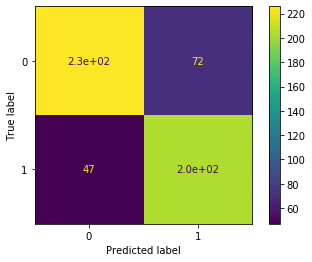

In [141]:
plot_confusion_matrix(clf,x_test,y_test)
plt.show()